In [230]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [231]:
#Read CSV file
titanic_df = pd.read_csv('titanic.csv')

In [232]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [233]:
#Dimensions
titanic_df.shape

(891, 12)

In [234]:
#Identify missing values 
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [235]:
#Summary statistics
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


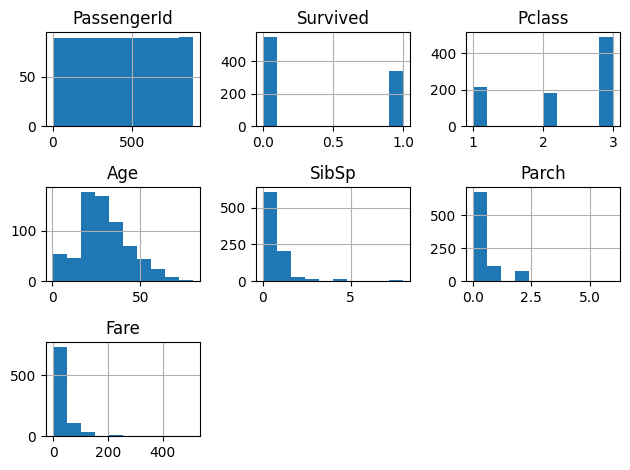

In [236]:
#Plot basic histograms for rough overview of data. 
titanic_df.hist()
plt.tight_layout()

**Clean and Preprocess Data**

In [237]:
#Replace null values with mean in Age column
X = titanic_df['Age'].mean()
titanic_df['Age'].fillna(X, inplace = True)

C:\Users\flore\AppData\Local\Temp\ipykernel_11308\1669290772.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(X, inplace = True)


In [238]:
#Encode binary variable (Sex)
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})

In [239]:
#Drop uneeded columns
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], inplace=True, axis=1)

In [240]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [241]:
#Feature scaling
columns = titanic_df.columns.tolist()
features = titanic_df.drop(columns=['Survived', 'Sex', 'Pclass'])

# Initialize StandardScaler
scaler = StandardScaler()

# Apply feature scaling
scaled_features = scaler.fit_transform(features)

# Create DataFrame for scaled features, then concatenate with Survived, Sex, Pclass
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

scaled_df['Survived'] = titanic_df['Survived']
scaled_df['Sex'] = titanic_df['Sex']
scaled_df['Pclass'] = titanic_df['Pclass']
scaled_df.head()

,Age,SibSp,Parch,Fare,Survived,Sex,Pclass
0,-0.592481,0.432793,-0.473674,-0.502445,0,0,3
1,0.638789,0.432793,-0.473674,0.786845,1,1,1
2,-0.284663,-0.474545,-0.473674,-0.488854,1,1,3
3,0.407926,0.432793,-0.473674,0.420730,1,1,1
4,0.407926,-0.474545,-0.473674,-0.486337,0,0,3


**Explore Data**
With reference to: 
● What is the most important factor in determining survival of the Titanic
incident?
● In the movie, the upper-class passengers were given preference on
lifeboats. Does this show in the data?
● “Women and children first”. Was this the case?
● Add one other observation that you have noted in the dataset.


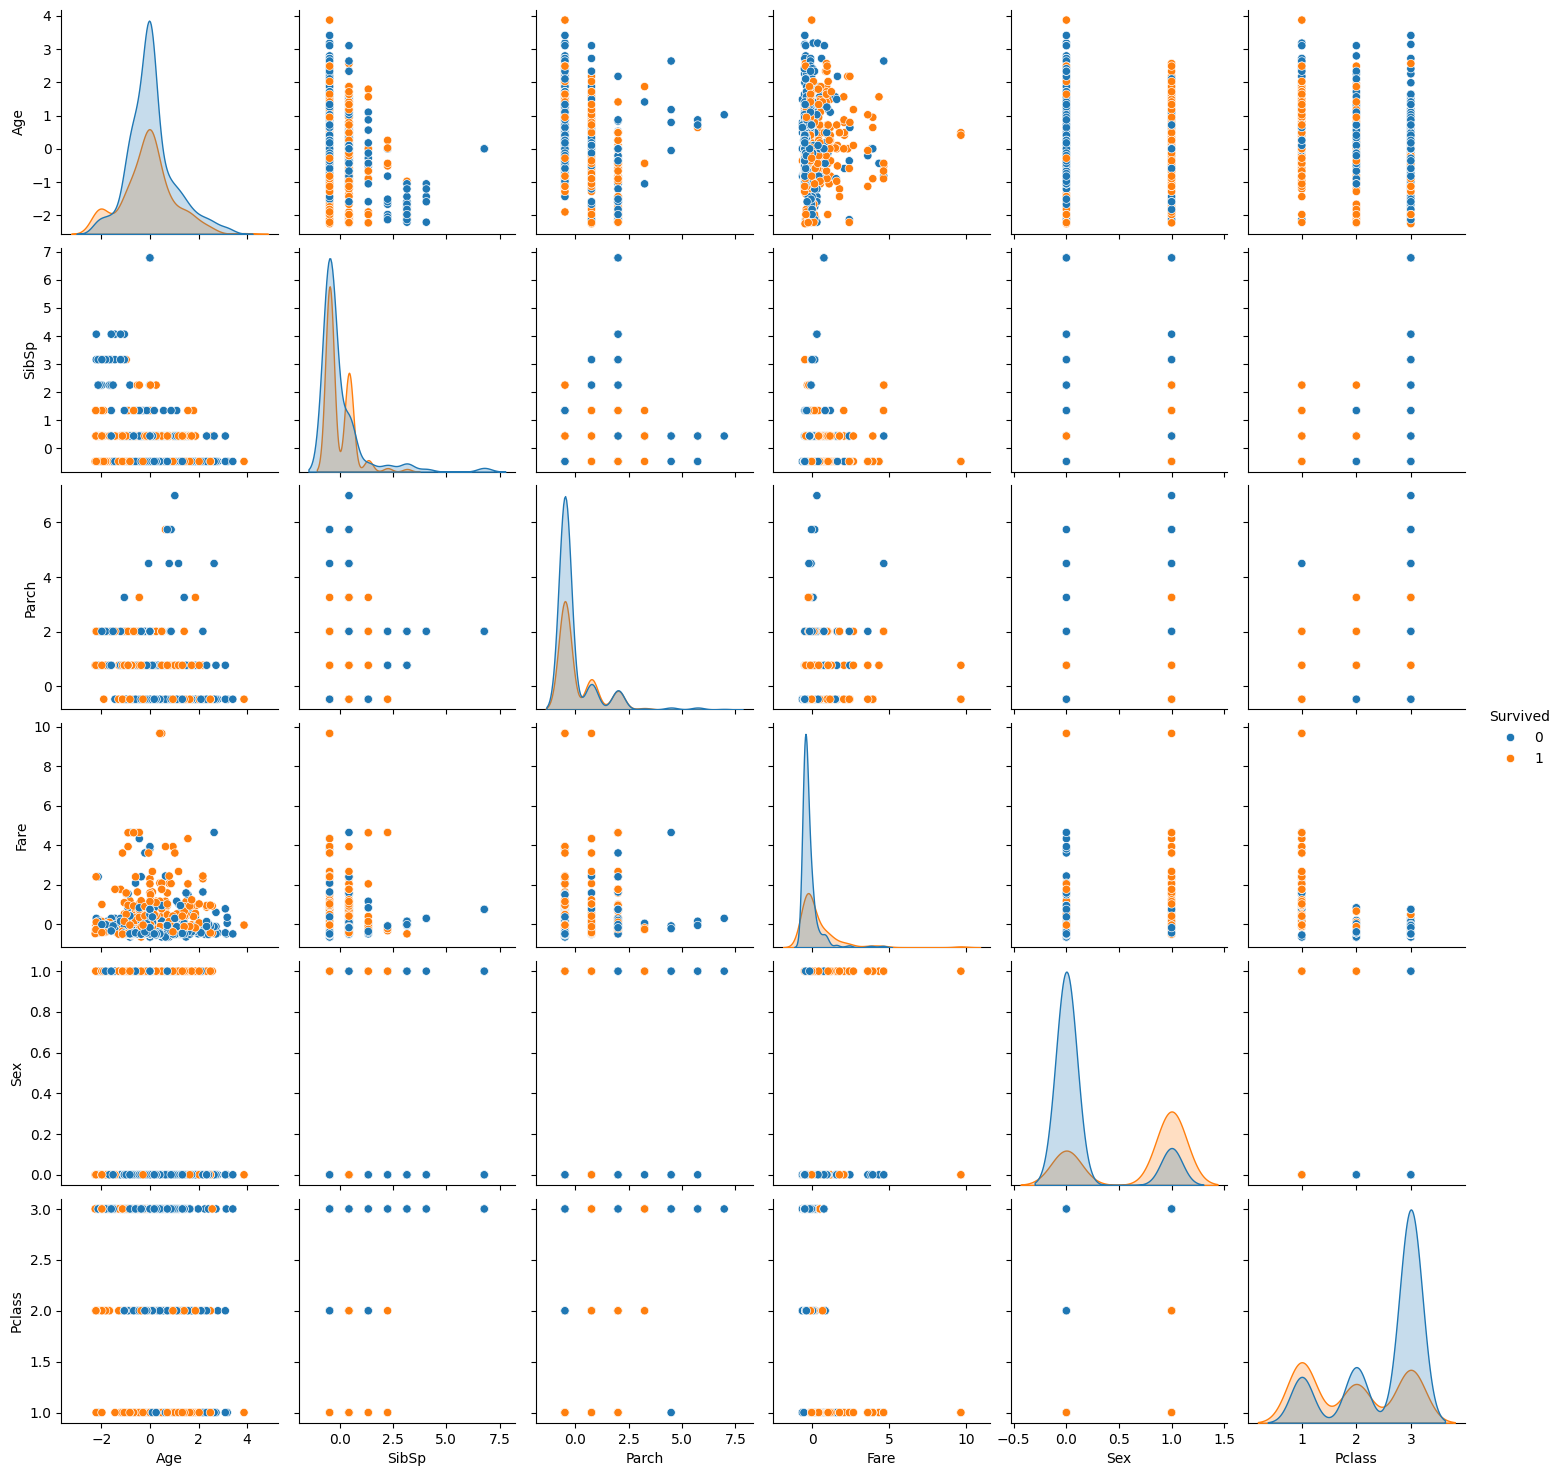

In [242]:
#Pairplot
sns.pairplot(scaled_df, hue = 'Survived')

Text(0.5, 1.0, 'Correlation Matrix')

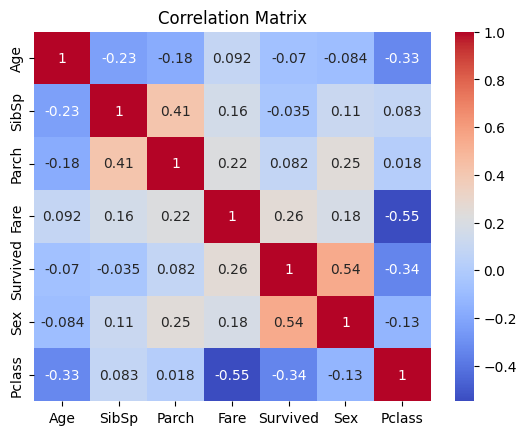

In [243]:
# Heatmap
sns.heatmap(scaled_df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')

**Pairplot/ Heatmap observations:**
The heatmap makes it clear which factors are more significant in determining survival of the Titanic incident. The strongest correlation is between sex and survival rate. Passenger class and fare are the factors with the most significant relationship with survival rate after sex. 

In [244]:
#Identifying mean survival rate by passenger class
scaled_df[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


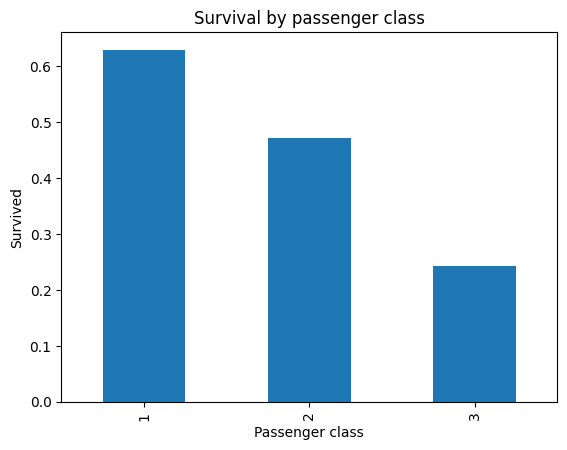

In [245]:
# Barplot for passenger class/ survival
scaled_df.groupby('Pclass')['Survived'].mean().plot.bar()
plt.title('Survival by passenger class')
plt.xlabel('Passenger class')
plt.ylabel('Survived')
plt.show()

**In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data?**
The barplot shows that on average passengers in 1st class were more likely to survive. Passengers in 3rd class were the least likely to survive. This does provide some evidence to suggest, as in the movie, upper-class passengers were given preference. 


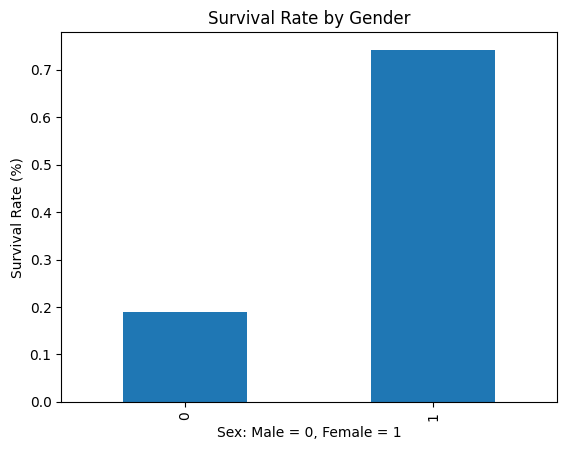

In [246]:
# Barchart showing survival rate by gender
scaled_df.groupby('Sex')['Survived'].mean().plot.bar()
plt.ylabel('Survival Rate (%)')
plt.xlabel('Sex: Male = 0, Female = 1')
plt.title('Survival Rate by Gender')
plt.show()

In [247]:
#Create new column called 'age group' grouping data from Age column into categories. 
bins = [0, 18, 35, 50, 65, np.inf]
labels = ['0-18', '18-35', '35-50', '50-65', 'Over 60']
scaled_df['age_group'] = pd.cut(titanic_df['Age'], bins=bins, labels=labels)
scaled_df.head()

,Age,SibSp,Parch,Fare,Survived,Sex,Pclass,age_group
0,-0.592481,0.432793,-0.473674,-0.502445,0,0,3,18-35
1,0.638789,0.432793,-0.473674,0.786845,1,1,1,35-50
2,-0.284663,-0.474545,-0.473674,-0.488854,1,1,3,18-35
3,0.407926,0.432793,-0.473674,0.420730,1,1,1,18-35
4,0.407926,-0.474545,-0.473674,-0.486337,0,0,3,18-35


In [248]:
# Calculate the survival rate by age group
scaled_df[['age_group', 'Survived']].groupby('age_group').mean()

C:\Users\flore\AppData\Local\Temp\ipykernel_11308\1879575890.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  scaled_df[['age_group', 'Survived']].groupby('age_group').mean()


,Survived
age_group,
0-18,0.503597
18-35,0.353271
35-50,0.398693
50-65,0.375000
Over 60,0.125000


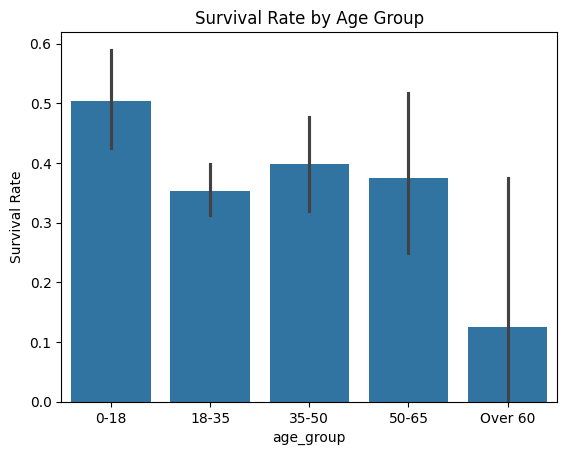

In [249]:
# Plot the survival rate by age group
sns.barplot(x='age_group', y='Survived', data=scaled_df)
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age Group')
plt.show()

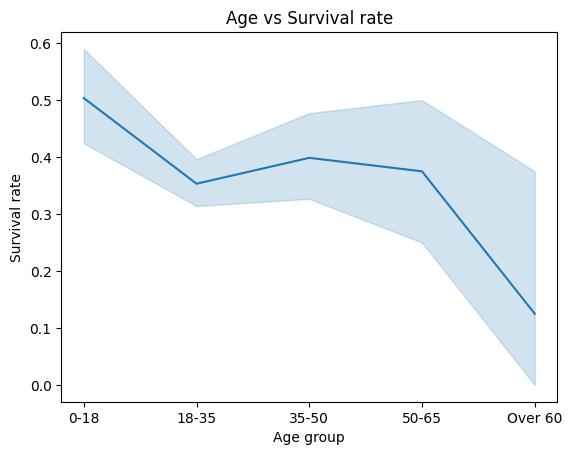

In [250]:
# Lineplot (Age vs Survival rate)
sns.lineplot(x='age_group', y='Survived', data=scaled_df)
plt.title('Age vs Survival rate')
plt.xlabel('Age group')
plt.ylabel('Survival rate')
plt.show()

**“Women and children first”. Was this the case?**
Women had a far greater survival rate compared to men as indicated by the barchart plotting survival by gender. In terms of age group, across both genders 0-18 year olds had a higher survival rate than other age groups. Therefore, there is some evidence to suggest women and children were given priority. 

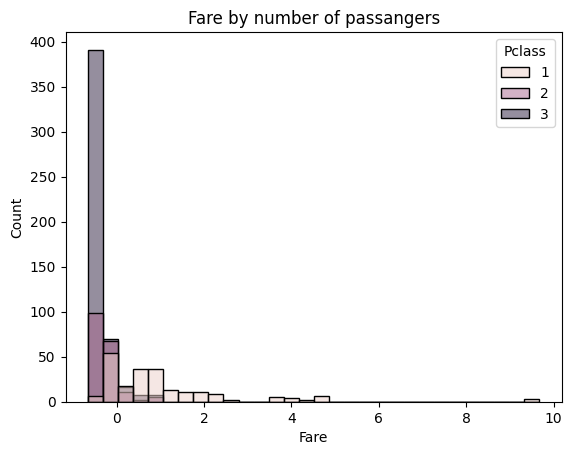

In [251]:
#Histogram showing fare distribution with Pclass as hue
sns.histplot(x='Fare', data=scaled_df, bins=30, hue='Pclass')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare by number of passangers')
plt.show()

**Add one other observation that you have noted in the dataset.**
The histogram above shows that there were far more passengers paying a low fare than a high one. It also shows that passengers in 1st class paid a wider range of fares. The histogram suggests that passengers of lower socioeconomic status were in the majority. 

**Overall Conclusions**
The EDA suggests that sex/ gender was the most important determinant of survival rate in the Titanic disaster. Women were more likely to survive than men overall. It also shows a clear distinction between survival rates across different passenger classes. 1st class passengers were the most likely to survive and 3rd class least. Analysis of survival rate by age group shows that children 0-18 had the highest survival rate. Therefore, it appears likely that women and children were prioritised. The majority of passengers paid a fare at the lower end of the pricing scale. 
